# Homework #1: Data Manipulation

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel!**

## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [2]:
# import packages
import pandas as pd
from pandas.io.html import read_html

In [4]:
# create host_city_df data frame from Wikipedia page
wiki_url = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
wiki_df = pd.read_html(wiki_url)
host_city_df = wiki_df[1]
host_city_df.columns = host_city_df.iloc[0]
host_city_df = host_city_df[1:]
host_city_df.head(10)

In [74]:
# create athlete_events_df data frame and noc_regions_df data frame
athlete_events_df = pd.read_csv('data/athlete_events.csv')
noc_regions_df = pd.read_csv('data/noc_regions.csv')

In [5]:
# create merged athlete events data frame and noc region data frame
athlete_events_merged = pd.merge(athlete_events_df, noc_regions_df, on='NOC')
athlete_events_merged.head()

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [5]:
# number of rows and columns in athlete_events_df
athlete_events_df.shape

(271116, 15)

In [82]:
# number of rows and columns in athlete_events_noc merged data frame
athlete_events_merged.shape

(270767, 17)

In [7]:
# number of rows and columns for the host_city_df
host_city_df.shape

(68, 10)

In [6]:
# descriptive statistics for athlete_events_df
athlete_events_merged.describe()

In [7]:
# descriptive statistics for host_city_df
host_city_df.describe()

(and explain your answers)

Each of the data frames included have different numbers of rows and columns. The athlete_events_df data frame has 271116 rows by 15 columns and the host_city_df has 68 rows and 10 columns. After merging the athlete_events_df with the noc_regions_df, it looks like 349 rows were lost, meaning there are NaN values that will need to be taken care of to complete the athlete_events_merged data frame. 

Some of the interesting descriptive details for the athlete_events_merged data frame include age, height, and weight. The host_city_df originating from Wikipedia differs in that its descriptive details include information about the city, country, continent, whether the events took place in summer or winter for Olympiad or summer or winter for youth, the year of the event, and the dates for the opening and closing ceremonies.    

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [8]:
athlete_events_df.head()

In [11]:
# counts for each sex from total athletes
athlete_events_df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [12]:
# data frame with unique athlete names only
unique_athletes = athlete_events_df[['Name', 'Sex']]
unique_athletes = unique_athletes.drop_duplicates()

# count of each sex from unique athlete names
unique_athletes['Sex'].value_counts()

M    100979
F     33808
Name: Sex, dtype: int64

In [13]:
print(33808/100979)

0.33480228562374353


Since multiple athletes compete in multiple events, I dropped all of the duplicate occurrences for athlete names. Once duplicate names were dropped, I considered the entire population of athletes to determine the ratio of female to male athletes. With duplicate names removed, the ratio of the overall population of each athlete for females to males is 33808:100979, or 0.334:1.

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [14]:
# athlete names in order of number events they competed
athlete_events_df['Name'].value_counts().head()

Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Name: Name, dtype: int64

In [15]:
# data frame for Robert Tait McKenzie, or the athlete who competed in the most number of events
#athlete_events_df[['Name', 'Year', 'NOC', 'Event']]
df_robert = athlete_events_df[athlete_events_df.Name=='Robert Tait McKenzie']
df_robert['Event'].value_counts()

Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Art Competitions Mixed Sculpturing, Medals                 1
Art Competitions Mixed Sculpturing                         1
Name: Event, dtype: int64

In [16]:
#unique_robert = df_robert[['Name', 'Event']].drop_duplicates()
#robert_years = df_robert['Year'].value_counts()
# data frame for the range of years Robert Tait McKenzie competed in the Olympics
robert_years = df_robert['Year'].drop_duplicates()
robert_years

154798    1912
154799    1928
154806    1932
154850    1936
154855    1948
Name: Year, dtype: int64

In [17]:
# Robert's team
df_robert['Team'].drop_duplicates()

154798    Canada
Name: Team, dtype: object

Given all of the events over all of the possible years for the Olympics, Robert Tait McKenzie, representing Canada, competed in the most number of events, or 58 events. Robert competed in Art Competitions Mixed Sculpturing in 5 categories, including: Unknown Event, Statues, Medals, Medals and Reliefs, and a blank category. The range of years he competed were between 1912 and 1948. 

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [18]:
athlete_events_df.head()
age_sport_df = athlete_events_df[['Age', 'Sport']]
sports = age_sport_df['Sport'].drop_duplicates()

# bin of sport names for plot axes
sport_list_bin = []
for sport in sports:
    sport_list_bin.append(sport)

# find median age values for each sport
median_age_p_sport = age_sport_df.groupby(['Sport'])['Age'].median()

In [34]:
# create data frame for sport and median age
bins = sorted(sport_list_bin)
median_age_lst = list(median_age_p_sport)
sport_age_df = pd.DataFrame({'Sport': bins, 'Median_Age': median_age_lst})
sorted_medians = sport_age_df.sort_values(by=['Median_Age'], ascending=False)
top_ten = sorted_medians.head(10)
top_ten

,Sport,Median_Age
42,Roque,59.0
4,Art Competitions,45.0
2,Alpinism,38.0
39,Polo,35.0
21,Equestrianism,33.0
16,Croquet,33.0
47,Shooting,33.0
37,Motorboating,31.0
31,Jeu De Paume,31.0
18,Curling,30.0


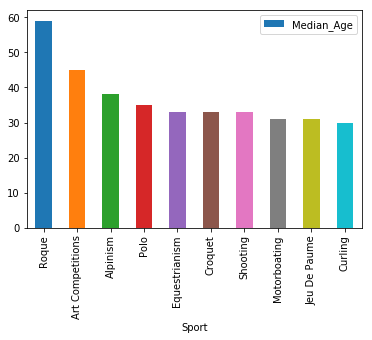

In [36]:
# create plot of the sports with the 10 highest median ages
bins = list(top_ten['Sport'])
vals = list(top_ten['Median_Age'])
final_df = pd.DataFrame({'Sport':bins, 'Median_Age':vals})
final_df.plot.bar(x='Sport', y='Median_Adorge')

The sport with the highest median athlete age is Roque. 

### 10 pt: In which events has Jamaica won the most medals?

In [21]:
# data frame of athletes from Jamaica 
athlete_events_df.head()
athlete_events_df[athlete_events_df['Team']=='Jamaica'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1539,854,Derrick Adamson,M,26.0,177.0,72.0,Jamaica,JAM,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Marathon,NaN
1540,854,Derrick Adamson,M,30.0,177.0,72.0,Jamaica,JAM,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,NaN
4048,2334,Samantha Albert (Majendie-),F,37.0,165.0,59.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN
4049,2334,Samantha Albert (Majendie-),F,41.0,165.0,59.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN
4285,2451,Peter Aldridge,M,19.0,173.0,69.0,Jamaica,JAM,1980 Summer,1980,Summer,Moskva,Cycling,"Cycling Men's Road Race, Individual",NaN


In [22]:
# data frame of Jamaica athletes sorted by each event within a sport, in order by the number of medals for each event
jamaica_df = athlete_events_df[athlete_events_df['Team']=='Jamaica']
jamaica_df.groupby(['Sport', 'Event']).count().sort_values(['Medal'], ascending=False).head(15)

ID  Name  Sex  Age  Height  \
Sport     Event                                                                
Athletics Athletics Women's 4 x 100 metres Relay  69    69   69   69      69   
          Athletics Men's 4 x 400 metres Relay    73    73   73   73      72   
          Athletics Women's 4 x 400 metres Relay  60    60   60   59      58   
          Athletics Men's 4 x 100 metres Relay    54    54   54   54      54   
          Athletics Women's 100 metres            39    39   39   39      36   
          Athletics Women's 200 metres            40    40   40   40      37   
          Athletics Men's 100 metres              40    40   40   39      38   
          Athletics Men's 200 metres              36    36   36   35      35   
          Athletics Men's 400 metres              45    45   45   45      45   
          Athletics Women's 400 metres            33    33   33   32      32   
          Athletics Women's 400 metres Hurdles    21    21   21   21      21   
          Athletics Men's 800 metres              15    15   15   15      15   
          Athletics Men's 400 metres Hurdles      23    23   23   23      23   
          Athletics Men's 110 metres Hurdles      20    20   20   19      19   
          Athletics Men's Long Jump               11    11   11   11      11   

                                                  Weight  Team  NOC  Games  \
Sport     Event                                                              
Athletics Athletics Women's 4 x 100 metres Relay      69    69   69     69   
          Athletics Men's 4 x 400 metres Relay        71    73   73     73   
          Athletics Women's 4 x 400 metres Relay      58    60   60     60   
          Athletics Men's 4 x 100 metres Relay        54    54   54     54   
          Athletics Women's 100 metres                36    39   39     39   
          Athletics Women's 200 metres                37    40   40     40   
          Athletics Men's 100 metres                  38    40   40     40   
          Athletics Men's 200 metres                  35    36   36     36   
          Athletics Men's 400 metres                  45    45   45     45   
          Athletics Women's 400 metres                32    33   33     33   
          Athletics Women's 400 metres Hurdles        21    21   21     21   
          Athletics Men's 800 metres                  15    15   15     15   
          Athletics Men's 400 metres Hurdles          23    23   23     23   
          Athletics Men's 110 metres Hurdles          18    20   20     20   
          Athletics Men's Long Jump                   11    11   11     11   

                                                  Year  Season  City  Medal  
Sport     Event                                                              
Athletics Athletics Women's 4 x 100 metres Relay    69      69    69     28  
          Athletics Men's 4 x 400 metres Relay      73      73    73     27  
          Athletics Women's 4 x 400 metres Relay    60      60    60     27  
          Athletics Men's 4 x 100 metres Relay      54      54    54     16  
          Athletics Women's 100 metres              39      39    39     13  
          Athletics Women's 200 metres              40      40    40     12  
          Athletics Men's 100 metres                40      40    40      8  
          Athletics Men's 200 metres                36      36    36      7  
          Athletics Men's 400 metres                45      45    45      5  
          Athletics Women's 400 metres              33      33    33      3  
          Athletics Women's 400 metres Hurdles      21      21    21      3  
          Athletics Men's 800 metres                15      15    15      2  
          Athletics Men's 400 metres Hurdles        23      23    23      2  
          Athletics Men's 110 metres Hurdles        20      20    20      2  
          Athletics Men's Long Jump                 11      11    11      1

Jamaica has won the most medals in events related to Athletics, specifically the Women's and Men's 4 x 100 metres Relays, the Women's 100 and 200 metres, the Men's 100 and 200 metres, and the Men's and Women's 400 metres. 

### 10 pt: Which countries have more female medalists than male medalists?

In [23]:
# create data frame that categorizes/sorts by country
# then gets value counts of female vs male medals
# then compares these values

# data frame that sorts by country, then combines by sex
sorted_countries = athlete_events_df.sort_values('NOC')
sorted_countries = sorted_countries.groupby(['NOC', 'Sex']).count()

#create a data frame from the groupby object
indexed_sorted_countries = sorted_countries.reset_index()
country_mf_medal = indexed_sorted_countries[['NOC', 'Sex', 'Medal']].copy()
country_mf_medal

#create pivot to determine if F > M
compare_country_medals_gender_df = country_mf_medal.pivot(index='NOC', columns='Sex', values='Medal')
compare_country_medals_gender_df['greater_than'] = compare_country_medals_gender_df['F'] > compare_country_medals_gender_df['M']
compare_country_medals_gender_df.head()

Sex,F,M,greater_than
NOC,,,
AFG,0.0,2.0,False
AHO,0.0,1.0,False
ALB,0.0,0.0,False
ALG,3.0,14.0,False
AND,0.0,0.0,False


In [24]:
#plot which countries have more female than male medalists
df = compare_country_medals_gender_df
new_df = df.reset_index()
new_df[new_df['greater_than']==True]

Sex,NOC,F,M,greater_than
25,BLR,77.0,62.0,True
30,BRN,3.0,0.0,True
41,CHN,654.0,335.0,True
49,CRC,4.0,0.0,True
102,JAM,86.0,71.0,True
110,KOS,1.0,0.0,True
120,LIE,5.0,4.0,True
136,MNE,14.0,0.0,True
138,MOZ,2.0,0.0,True
157,PER,12.0,3.0,True


Countries that had more female medalists than male medalists include: BLR, BRN, CHN, CRC, JAM, KOS, LIE, MNE, MOZ, PER, PRK, ROU, SGP, UKR, and ZIM.

### 10 pt: Which country won the most medal points in the 2014 Winter Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [42]:
# create data frame for the 2014 winter Olympics
sorted_countries = athlete_events_df.sort_values('NOC')

# sorted_countries
fourteen_df = sorted_countries[sorted_countries['Year']==2014]
fourteen_df = fourteen_df.groupby(['NOC', 'Medal']).count()
fourteen_df.head()

ID  Name  Sex  Age  Height  Weight  Team  Games  Year  Season  \
NOC Medal                                                                   
AUS Bronze   1     1    1    1       1       1     1      1     1       1   
    Silver   2     2    2    2       2       2     2      2     2       2   
AUT Bronze  11    11   11   11      11      11    11     11    11      11   
    Gold     4     4    4    4       4       4     4      4     4       4   
    Silver  12    12   12   12      12      12    12     12    12      12   

            City  Sport  Event  
NOC Medal                       
AUS Bronze     1      1      1  
    Silver     2      2      2  
AUT Bronze    11     11     11  
    Gold       4      4      4  
    Silver    12     12     12

In [43]:
# create data frame to map medal counts to
fourteen_df = fourteen_df.reset_index()
fourteen_df.head()
# winter_df = fourteen_df[['NOC', 'Medal', 'Event']]
# winter_df.head()

,NOC,Medal,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event
0,AUS,Bronze,1,1,1,1,1,1,1,1,1,1,1,1,1
1,AUS,Silver,2,2,2,2,2,2,2,2,2,2,2,2,2
2,AUT,Bronze,11,11,11,11,11,11,11,11,11,11,11,11,11
3,AUT,Gold,4,4,4,4,4,4,4,4,4,4,4,4,4
4,AUT,Silver,12,12,12,12,12,12,12,12,12,12,12,12,12


In [44]:
# add medal counts to data frame
fourteen_df['medal_count'] = fourteen_df['Medal'].map({'Bronze':1, 'Silver':2, 'Gold':3})
fourteen_df.head()

,NOC,Medal,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,medal_count
0,AUS,Bronze,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,AUS,Silver,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,AUT,Bronze,11,11,11,11,11,11,11,11,11,11,11,11,11,1
3,AUT,Gold,4,4,4,4,4,4,4,4,4,4,4,4,4,3
4,AUT,Silver,12,12,12,12,12,12,12,12,12,12,12,12,12,2


In [45]:
# get total counts for medals, then add them together for each country
fourteen_df['medal_points'] = fourteen_df['Event']*fourteen_df['medal_count']
fourteen_df.head()

,NOC,Medal,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,medal_count,medal_points
0,AUS,Bronze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,AUS,Silver,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4
2,AUT,Bronze,11,11,11,11,11,11,11,11,11,11,11,11,11,1,11
3,AUT,Gold,4,4,4,4,4,4,4,4,4,4,4,4,4,3,12
4,AUT,Silver,12,12,12,12,12,12,12,12,12,12,12,12,12,2,24


In [46]:
# create data frame that gives the values for all of the countries and their respective medal points
medal_counts_df = fourteen_df[['NOC', 'medal_points']].copy()
medal_counts_df.head()
final_counts = medal_counts_df.groupby(['NOC']).sum()['medal_points']
final_counts.sort_values(ascending=False).head(15)

NOC
CAN    226
RUS    156
USA    114
SWE     99
GER     78
NOR     77
NED     62
AUT     47
SUI     46
FIN     44
KOR     33
FRA     30
POL     23
CHN     22
CZE     22
Name: medal_points, dtype: int64

For the medal points by country, it seems that Canada, Russia, and the United States were in the lead in the 2014 Winter Olympics. Canada had the most points overall with 226 points. For this result, I considered the number of medals per country and each medal was weighted depending on the type. For instance, a gold medal was given a weight of 3, while a silver was given 2, and a bronze was given 1. 

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [60]:
# data frame for all of the years the Olympic games were held
m = athlete_events_df['Year']
m = m.to_frame()
df = m.drop_duplicates()
year_df = df.sort_values(by=['Year'])

# list of years the games were held, can be used for bin number when making a plot
year_lst = list(year_df['Year'])

In [61]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [78]:
# merge data frames of host countries and merged athlete events - the head for the unmerged and merged data frames look to be in the same order
athlete_events_merged['Year'] = athlete_events_merged['Year'].apply(str)
total_merge_df = pd.merge(athlete_events_merged, host_city_df, on='Year', how='left')
total_merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,notes,City_y,Country,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Opening Ceremony,Closing Ceremony
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,Albertville,France,Europe,NaN,NaN,NaN,NaN,February 8,February 23
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,NaN,Innsbruck,Austria,Europe,NaN,NaN,NaN,NaN,January 13,January 22
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,NaN,Sydney,Australia,Oceania,NaN,NaN,NaN,NaN,September 15,October 1
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,NaN,Athens,Greece,Europe,NaN,NaN,NaN,NaN,August 13,August 29
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,NaN,Lillehammer,Norway,Europe,NaN,NaN,NaN,NaN,February 12,February 21


In [79]:
# this shows that the merged data frame has the correct number of rows and columns, or that the number of separate rows and columns are equal to the combined number of rows and columns
total_merge_df.shape

(270767, 26)

In [98]:
# data frame grouped by year and participating country
year_country_partic_df = total_merge_df.groupby(['Year', 'Country', 'region']).count()
year_country_partic_df['Host Partic Medals'] = year_country_partic_df['Medal']
year_country_partic_df = year_country_partic_df.reset_index()
year_country_partic_df.head()

,Year,Country,region,ID,Name,Sex,Age,Height,Weight,Team,...,notes,City_y,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Opening Ceremony,Closing Ceremony,Host Partic Medals
0,1896,Greece,Australia,5,5,5,5,0,0,5,...,0,5,5,0,0,0,0,5,5,3
1,1896,Greece,Austria,8,8,8,8,0,0,8,...,0,8,8,0,0,0,0,8,8,5
2,1896,Greece,Denmark,15,15,15,15,0,0,15,...,0,15,15,0,0,0,0,15,15,6
3,1896,Greece,France,26,26,26,19,0,0,26,...,0,26,26,0,0,0,0,26,26,11
4,1896,Greece,Germany,94,94,94,84,22,28,94,...,0,94,94,0,0,0,0,94,94,32


(Use this space to explain your answers)

In [99]:
# combining data frames to compare number of medals
medal_compare = pd.merge(year_country_partic_df, total_merged_by_host, on='Year')
medal_compare.head()

,Year,Country_x,region_x,ID_x,Name_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,...,region_y,notes_y,City_y_y,Continent_y,Summer (Olympiad)_y,Winter_y,Summer (Youth)_y,Winter (Youth)_y,Opening Ceremony_y,Closing Ceremony_y
0,1896,Greece,Australia,5,5,5,5,0,0,5,...,380,0,380,380,0,0,0,0,380,380
1,1896,Greece,Austria,8,8,8,8,0,0,8,...,380,0,380,380,0,0,0,0,380,380
2,1896,Greece,Denmark,15,15,15,15,0,0,15,...,380,0,380,380,0,0,0,0,380,380
3,1896,Greece,France,26,26,26,19,0,0,26,...,380,0,380,380,0,0,0,0,380,380
4,1896,Greece,Germany,94,94,94,84,22,28,94,...,380,0,380,380,0,0,0,0,380,380


In [100]:
# list of the new column names to determine what to use for calculations
print(list(medal_compare))

['Year', 'Country_x', 'region_x', 'ID_x', 'Name_x', 'Sex_x', 'Age_x', 'Height_x', 'Weight_x', 'Team_x', 'NOC_x', 'Games_x', 'Season_x', 'City_x_x', 'Sport_x', 'Event_x', 'Medal_x', 'notes_x', 'City_y_x', 'Continent_x', 'Summer (Olympiad)_x', 'Winter_x', 'Summer (Youth)_x', 'Winter (Youth)_x', 'Opening Ceremony_x', 'Closing Ceremony_x', 'Host Partic Medals', 'Country_y', 'ID_y', 'Name_y', 'Sex_y', 'Age_y', 'Height_y', 'Weight_y', 'Team_y', 'NOC_y', 'Games_y', 'Season_y', 'City_x_y', 'Sport_y', 'Event_y', 'Medal_y', 'region_y', 'notes_y', 'City_y_y', 'Continent_y', 'Summer (Olympiad)_y', 'Winter_y', 'Summer (Youth)_y', 'Winter (Youth)_y', 'Opening Ceremony_y', 'Closing Ceremony_y']


In [105]:
# create more manageable data frame to manipulate for calculations
small_medal_compare = medal_compare[['Country_x', 'Medal_x', 'region_x', 'Host Partic Medals']]
small_medal_compare.head(10)

,Country_x,Medal_x,region_x,Host Partic Medals
0,Greece,3,Australia,3
1,Greece,5,Austria,5
2,Greece,6,Denmark,6
3,Greece,11,France,11
4,Greece,32,Germany,32
5,Greece,48,Greece,48
6,Greece,6,Hungary,6
7,Greece,0,Italy,0
8,Greece,0,Sweden,0
9,Greece,3,Switzerland,3


In [108]:
# calculations
medal_compare['Medal Proportion'] = medal_compare['Host Partic Medals']/medal_compare['Medal_x']
medal_compare[['Country_x', 'Medal_x', 'region_x', 'Host Partic Medals', 'Medal Proportion']].head()

,Country_x,Medal_x,region_x,Host Partic Medals,Medal Proportion
0,Greece,3,Australia,3,1.0
1,Greece,5,Austria,5,1.0
2,Greece,6,Denmark,6,1.0
3,Greece,11,France,11,1.0
4,Greece,32,Germany,32,1.0
